In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
os.chdir("/content/gdrive/My Drive")
#dir()
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install netcdf4
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1" "basemap-data-hires == 1.3.0b1"
!pip install basemap
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 5.2 MB/s 
     |████████████████████████████████| 30.5 MB 1.2 MB/s 
     |████████████████████████████████| 91.1 MB 1.2 MB/s 
     |████████████████████████████████| 219 kB 33.3 MB/s 
     |████████████████████████████████| 7.7 MB 39.0 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=91174bf051aa5113968d847d8a29ecb27b35bccb93b75064d01ca7f3203a6d12
  Stored in directory: /root/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Cargar datos

## Viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Viento/Canarias/Data_anual/'
ifile = 'GLOBAL_REANALYSIS_PHY_Viento.nc' # Elegir el archivo .nc
d1_C_W = xr.open_dataset(ifile)
#d1_C_W=d1_C_W.sel(time=filtro_meses(d1_C_W['time.month']))
d1_C_W.lon.values[d1_C_W.lon.values < 0] = d1_C_W.lon.values[d1_C_W.lon.values < 0] + 360 # convertir a 0-360 ªE
lat2d, lon2d = d1_C_W['lat'].values,d1_C_W['lon'].values #vectores 2D lat y 2D lon

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Viento/Canarias/Data_anual


In [ ]:
d1_C_W

<xarray.Dataset>
Dimensions:         (time: 9861, lat: 121, lon: 81)
Coordinates:
  * time            (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat             (lat) float32 15.0 15.25 15.5 15.75 ... 44.5 44.75 45.0
  * lon             (lon) float32 335.0 335.2 335.5 335.8 ... 354.5 354.8 355.0
Data variables:
    eastward_wind   (time, lat, lon) float64 ...
    northward_wind  (time, lat, lon) float64 ...

In [ ]:
tiempos= d1_C_W.time.values
tiempos

array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

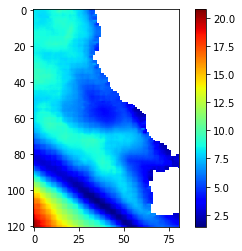

In [ ]:
plt.imshow(np.sqrt(d1_C_W.eastward_wind.values[0,:,:]**2 + d1_C_W.northward_wind.values[0,:,:]**2), cmap='jet')
plt.colorbar()

In [ ]:
#~mask sobre tierra
indices=np.where(~np.isnan(d1_C_W.eastward_wind.values[0,:,:])== True,1, np.nan)
indices

array([[ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [ ]:
d1_C_W.sel(lon=-12.75+360,lat=28).eastward_wind.drop(['lat','lon'])

<xarray.DataArray 'eastward_wind' (time: 9861)>
array([-2.074951, -0.499756, -3.752441, ..., -4.754883, -3.590088, -3.685059])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

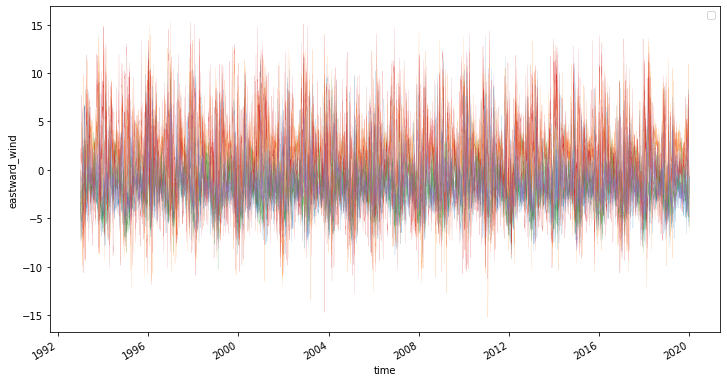

In [ ]:
U_Beddouza= d1_C_W.sel(lon=-9.5+360,lat=32.5).eastward_wind.drop(['lat','lon'])
U_Vincent= d1_C_W.sel(lon=-9+360,lat=37).eastward_wind.drop(['lat','lon'])
U_Blanc= d1_C_W.sel(lon=-17+360,lat=21).eastward_wind.drop(['lat','lon'])
U_Silleira= d1_C_W.sel(lon=-9+360,lat=42).eastward_wind.drop(['lat','lon'])
U_Juby= d1_C_W.sel(lon=-12.75+360,lat=28).eastward_wind.drop(['lat','lon'])
plt.figure(figsize=(12,6))
U_Beddouza.plot(linewidth=0.1)
U_Vincent.plot(linewidth=0.1)
U_Blanc.plot(linewidth=0.1)
U_Silleira.plot(linewidth=0.1)
U_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_U=pd.concat([U_Beddouza.to_dataframe(),U_Vincent.to_dataframe(),U_Blanc.to_dataframe(),U_Silleira.to_dataframe(),U_Juby.to_dataframe()],axis=1)
df_U.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_U.to_csv('U_Canarias.csv',index=True,sep=',')
df_U.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,-4.852295,-2.369873,-2.949951,-4.992432,-2.074951
1993-01-02,-3.367676,-0.310059,-2.177490,-3.184814,-0.499756
1993-01-03,-2.109863,-0.119873,-5.860107,0.807373,-3.752441
1993-01-04,-4.507324,0.070068,-7.129883,2.317139,-5.284912
1993-01-05,-3.649902,-4.794922,-3.300049,0.860107,-5.479980


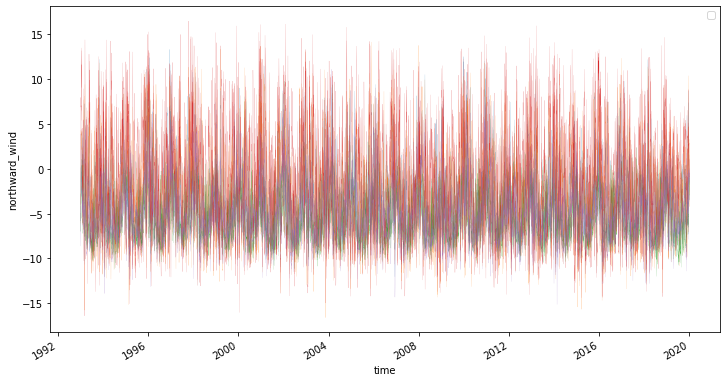

In [ ]:
V_Beddouza= d1_C_W.sel(lon=-9.5+360,lat=32.5).northward_wind.drop(['lat','lon'])
V_Vincent= d1_C_W.sel(lon=-9+360,lat=37).northward_wind.drop(['lat','lon'])
V_Blanc= d1_C_W.sel(lon=-17+360,lat=21).northward_wind.drop(['lat','lon'])
V_Silleira= d1_C_W.sel(lon=-9+360,lat=42).northward_wind.drop(['lat','lon'])
V_Juby= d1_C_W.sel(lon=-12.75+360,lat=28).northward_wind.drop(['lat','lon'])
plt.figure(figsize=(12,6))
V_Beddouza.plot(linewidth=0.1)
V_Vincent.plot(linewidth=0.1)
V_Blanc.plot(linewidth=0.1)
V_Silleira.plot(linewidth=0.1)
V_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_V=pd.concat([V_Beddouza.to_dataframe(),V_Vincent.to_dataframe(),V_Blanc.to_dataframe(),V_Silleira.to_dataframe(),V_Juby.to_dataframe()],axis=1)
df_V.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_V.to_csv('V_Canarias.csv',index=True,sep=',')
df_V.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,-2.834961,-2.747559,-4.944824,-4.002441,-4.147705
1993-01-02,-5.835205,-5.782227,-6.990234,-2.730225,-6.807373
1993-01-03,-5.050049,-6.095215,-6.475098,3.240234,-8.627441
1993-01-04,-2.612549,-0.347656,-3.299805,7.965088,-4.222412
1993-01-05,-0.937500,0.947510,-0.020020,7.197510,1.884766


In [ ]:
# Hovmoller
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
U_H=d1_C_W.groupby('lat').mean('lon').eastward_wind.to_dataframe().reset_index()
V_H=d1_C_W.groupby('lat').mean('lon').northward_wind.to_dataframe().reset_index()
U_H.to_csv('Hovmoller_U_Canarias.csv',sep=',')
V_H.to_csv('Hovmoller_V_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Presion

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_PRESION_ATMOSFERICA/Canarias/'
ifile = 'Canarias_Presion_atmosferica.nc' # Elegir el archivo .nc
var = 'sp' # elegir la variable de interes (Pascales)
d1_P = xr.open_dataset(ifile) # filtrar la variable del archivo de interes
d1_P=d1_P.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_P= d1_P[var] #seleccionar variable de interes
#d1_P=d1_P.sel(lon=slice(-130,-110),lat=slice(20,50)) # recortar el xarray
d1_P=d1_P.reindex(lat=list(reversed(d1_P.lat))) # Invertir valores de lat para qye queden iguales
d1_P=d1_P.assign_coords({"lon": d1_P.lon + 360}) # cambiar coordenadas de lon
#d1_P=d1_P.sel(time=filtro_meses(d1_P['time.month']))
d1_P=d1_P.sel(lon=slice(-25+360,-5+360),lat=slice(15,45)) # recortar el xarray
d1_P.values= d1_P.values*indices # masking sobre tierra
d1_P

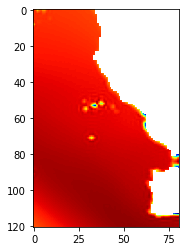

In [ ]:
plt.imshow(d1_P.values[0,:,:],cmap='jet')

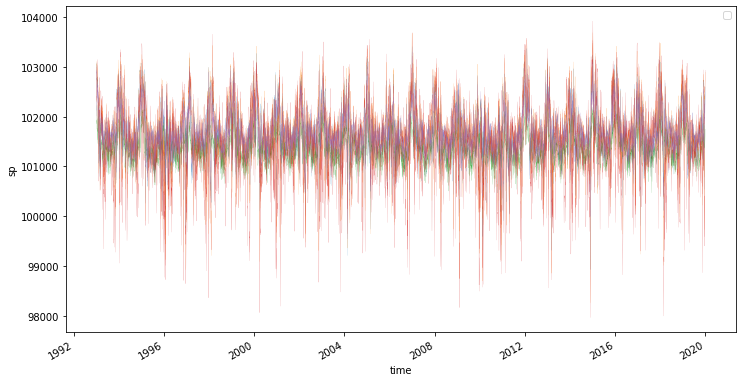

In [ ]:
P_Beddouza= d1_P.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon'])
P_Vincent= d1_P.sel(lon=-9+360,lat=37).drop(['lat','lon'])
P_Blanc= d1_P.sel(lon=-17+360,lat=21).drop(['lat','lon'])
P_Silleira= d1_P.sel(lon=-9+360,lat=42).drop(['lat','lon'])
P_Juby= d1_P.sel(lon=-12.75+360,lat=28).drop(['lat','lon'])
plt.figure(figsize=(12,6))
P_Beddouza.plot(linewidth=0.1)
P_Vincent.plot(linewidth=0.1)
P_Blanc.plot(linewidth=0.1)
P_Silleira.plot(linewidth=0.1)
P_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_P=pd.concat([P_Beddouza.to_dataframe(),P_Vincent.to_dataframe(),P_Blanc.to_dataframe(),P_Silleira.to_dataframe(),P_Juby.to_dataframe()],axis=1)
df_P.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_P.to_csv('P_Canarias.csv',index=True,sep=',')
df_P.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,102127.039062,102341.687500,101749.125000,102414.750000,102013.437500
1993-01-02,102215.179688,102302.929688,101835.320312,102333.867188,102208.062500
1993-01-03,102610.820312,102560.898438,101934.812500,102392.562500,102463.085938
1993-01-04,102778.750000,102835.539062,101882.351562,102462.757812,102505.726562
1993-01-05,102732.226562,102951.718750,101853.562500,102819.148438,102530.625000


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
P_H=d1_P.groupby('lat').mean('lon').to_dataframe().reset_index()
P_H.to_csv('Hovmoller_P_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Temperatura

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_TEMPERATURA_ATMOSFERICA/Canarias/'
ifile = 'Canarias_Taire.nc' # Elegir el archivo .nc
var='t2m'
d1_T= xr.open_dataset(ifile)
d1_T=d1_T.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_T= d1_T[var] #seleccionar variable de interes
d1_T=d1_T.reindex(lat=list(reversed(d1_T.lat))) # Invertir valores de lat para qye queden iguales
d1_T=d1_T.assign_coords({"lon": d1_T.lon + 360}) # cambiar coordenadas de lon
#d1_T=d1_T.sel(time=filtro_meses(d1_T['time.month']))
d1_T=d1_T.sel(lon=slice(-25+360,-5+360),lat=slice(15,45)) # recortar el xarray
d1_T.values= d1_T.values*indices # masking sobre tierra
d1_T

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_TEMPERATURA_ATMOSFERICA/Canarias


<xarray.DataArray 't2m' (time: 9861, lat: 121, lon: 81)>
array([[[295.23989868, 294.89035034, 293.88183594, ...,          nan,
                  nan,          nan],
        [295.14797974, 295.00454712, 294.36904907, ...,          nan,
                  nan,          nan],
        [295.03829956, 295.06491089, 294.93164062, ...,          nan,
                  nan,          nan],
        ...,
        [287.51846313, 287.50839233, 287.49563599, ..., 284.01556396,
         283.86959839, 283.7975769 ],
        [287.43261719, 287.41665649, 287.39569092, ..., 284.15066528,
         284.07684326, 284.03793335],
        [287.34921265, 287.32089233, 287.28652954, ..., 284.07632446,
         284.00802612, 283.97854614]],

       [[295.46984863, 295.1835022 , 294.19934082, ...,          nan,
                  nan,          nan],
        [295.29046631, 295.24267578, 294.65811157, ...,          nan,
                  nan,          nan],
        [295.10055542, 295.21304321, 295.16482544, ...,          nan,
                  nan,          nan],
...
        [286.59130859, 286.37063599, 286.26361084, ..., 285.60415649,
         285.4836731 , 285.35800171],
        [286.52035522, 286.36956787, 286.24557495, ..., 285.35546875,
         285.23400879, 285.16134644],
        [286.47436523, 286.34368896, 286.21426392, ..., 285.11694336,
         284.96194458, 284.84646606]],

       [[297.05474854, 296.71578979, 295.71548462, ...,          nan,
                  nan,          nan],
        [296.78924561, 296.67666626, 296.03878784, ...,          nan,
                  nan,          nan],
        [296.51089478, 296.60040283, 296.48709106, ...,          nan,
                  nan,          nan],
        ...,
        [287.68435669, 287.56997681, 287.51834106, ..., 285.76153564,
         285.70291138, 285.70843506],
        [287.6177063 , 287.54837036, 287.47879028, ..., 285.64987183,
         285.65789795, 285.71298218],
        [287.57000732, 287.51651001, 287.44094849, ..., 285.58200073,
         285.56613159, 285.59588623]]])
Coordinates:
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0

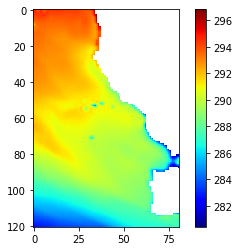

In [ ]:
plt.imshow(d1_T.values[12,:,:],cmap='jet')
plt.colorbar()

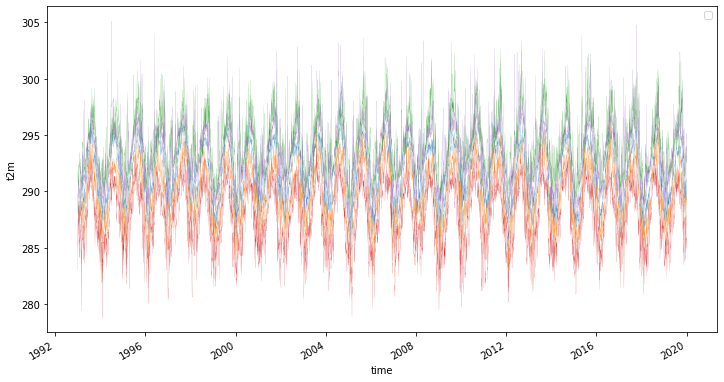

In [ ]:
T_Beddouza= d1_T.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon'])
T_Vincent= d1_T.sel(lon=-9+360,lat=37).drop(['lat','lon'])
T_Blanc= d1_T.sel(lon=-17+360,lat=21).drop(['lat','lon'])
T_Silleira= d1_T.sel(lon=-9+360,lat=42).drop(['lat','lon'])
T_Juby= d1_T.sel(lon=-12.75+360,lat=28).drop(['lat','lon'])
plt.figure(figsize=(12,6))
T_Beddouza.plot(linewidth=0.1)
T_Vincent.plot(linewidth=0.1)
T_Blanc.plot(linewidth=0.1)
T_Silleira.plot(linewidth=0.1)
T_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_T=pd.concat([T_Beddouza.to_dataframe(),T_Vincent.to_dataframe(),T_Blanc.to_dataframe(),T_Silleira.to_dataframe(),T_Juby.to_dataframe()],axis=1)
df_T.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_T.to_csv('T_Canarias.csv',index=True,sep=',')
df_T.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,288.886322,285.670044,290.751465,283.078949,288.807617
1993-01-02,288.348969,285.045288,291.493469,283.155884,289.090485
1993-01-03,288.239136,285.868500,291.834167,283.456940,289.837860
1993-01-04,288.085388,287.249756,291.845184,285.826385,289.664764
1993-01-05,288.045837,287.758484,291.159180,287.597015,288.931122


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
T_H=d1_T.groupby('lat').mean('lon').to_dataframe().reset_index()
T_H.to_csv('Hovmoller_T_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Radiacion onda corta (Qsw)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_RADIACION_ONDA_CORTA(QSW)/Canarias/'
ifile = 'Canarias_QSW.nc' # Elegir el archivo .nc
var='ssrd'
d1_Q= xr.open_dataset(ifile)
d1_Q=d1_Q.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_Q= d1_Q[var] #seleccionar variable de interes
d1_Q=d1_Q.reindex(lat=list(reversed(d1_Q.lat))) # Invertir valores de lat para qye queden iguales
d1_Q=d1_Q.assign_coords({"lon": d1_Q.lon + 360}) # cambiar coordenadas de lon
#d1_Q=d1_Q.sel(time=filtro_meses(d1_Q['time.month']))
d1_Q=d1_Q.sel(lon=slice(-25+360,-5+360),lat=slice(15,45)) # recortar el xarray
d1_Q.values= d1_Q.values*indices # masking sobre tierra
d1_Q

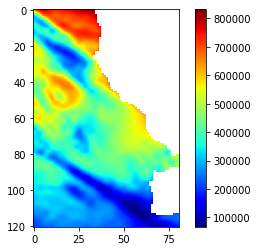

In [ ]:
plt.imshow(d1_Q.values[12,:,:],cmap='jet')
plt.colorbar()

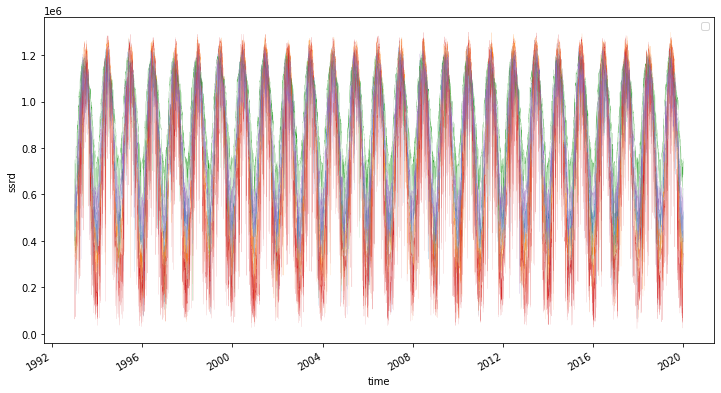

In [ ]:
Q_Beddouza= d1_Q.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon'])
Q_Vincent= d1_Q.sel(lon=-9+360,lat=37).drop(['lat','lon'])
Q_Blanc= d1_Q.sel(lon=-17+360,lat=21).drop(['lat','lon'])
Q_Silleira= d1_Q.sel(lon=-9+360,lat=42).drop(['lat','lon'])
Q_Juby= d1_Q.sel(lon=-12.75+360,lat=28).drop(['lat','lon'])
plt.figure(figsize=(12,6))
Q_Beddouza.plot(linewidth=0.1)
Q_Vincent.plot(linewidth=0.1)
Q_Blanc.plot(linewidth=0.1)
Q_Silleira.plot(linewidth=0.1)
Q_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_Q=pd.concat([Q_Beddouza.to_dataframe(),Q_Vincent.to_dataframe(),Q_Blanc.to_dataframe(),Q_Silleira.to_dataframe(),Q_Juby.to_dataframe()],axis=1)
df_Q.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_Q.to_csv('Q_Canarias.csv',index=True,sep=',')
df_Q.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,450474.28125,440008.25000,667522.06250,341093.781250,559665.1875
1993-01-02,398975.37500,414295.46875,466655.90625,334554.406250,521785.8750
1993-01-03,409519.75000,378338.90625,378738.25000,334193.062500,428948.3750
1993-01-04,531923.31250,330696.00000,571715.56250,62821.402344,602820.5625
1993-01-05,532565.18750,424678.12500,498395.21875,165023.250000,571010.5625


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
Q_H=d1_Q.groupby('lat').mean('lon').to_dataframe().reset_index()
Q_H.to_csv('Hovmoller_Q_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Corrientes

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Corrientes/Canarias/Data_anual/'
ifile = 'GLOBAL_REANALYSIS_PHY_Corrientes.nc' # Elegir el archivo .nc
d1_C = xr.open_dataset(ifile)
#d1_C=d1_C.sel(time=filtro_meses(d1_C['time.month']))
d1_C.lon.values[d1_C.lon.values < 0] = d1_C.lon.values[d1_C.lon.values < 0] + 360 # convertir a 0-360 ªE
lat2d, lon2d = d1_C['lat'].values,d1_C['lon'].values #vectores 2D lat y 2D lon

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Corrientes/Canarias/Data_anual


In [ ]:
d1_C

<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, time: 9861)
Coordinates:
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
Data variables:
    U        (time, lat, lon) float32 ...
    V        (time, lat, lon) float32 ...
Attributes: (12/15)
    product:                       GLOBAL_REANALYSIS_PHY_001_031
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    area:                          Global
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    ...                            ...
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    history:                       Creation 2022-Mar-05 02:35:00 GMT+0200
    title:                         Daily mean fields for product GLOBAL_REANA...
    source:                        Copernicus Marine Service
    dataset:                       global-reanalysis-phy-001-031-grepv2-daily

In [ ]:
tiempos= d1_C.time.values
tiempos

array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

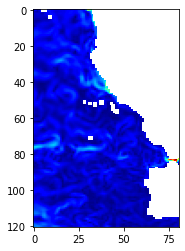

In [ ]:
plt.imshow(np.sqrt(d1_C.U.values[0,:,:]**2 + d1_C.V.values[0,:,:]**2), cmap='jet')

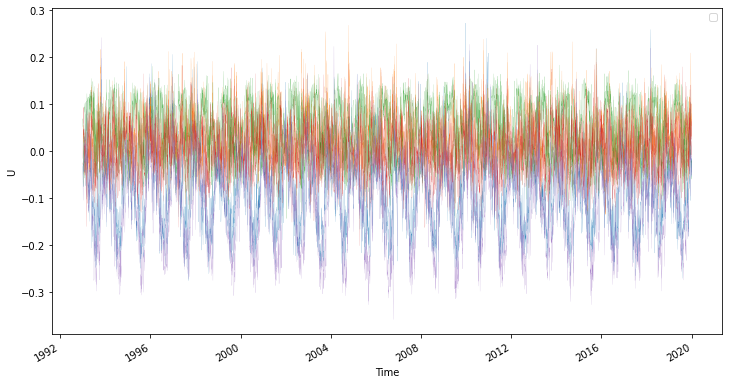

In [ ]:
U_Beddouza= d1_C.sel(lon=-9.5+360,lat=32.5).U.drop(['lat','lon','depth'])
U_Vincent= d1_C.sel(lon=-9+360,lat=37).U.drop(['lat','lon','depth'])
U_Blanc= d1_C.sel(lon=-17+360,lat=21).U.drop(['lat','lon','depth'])
U_Silleira= d1_C.sel(lon=-9+360,lat=42).U.drop(['lat','lon','depth'])
U_Juby= d1_C.sel(lon=-12.75+360,lat=28).U.drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
U_Beddouza.plot(linewidth=0.1)
U_Vincent.plot(linewidth=0.1)
U_Blanc.plot(linewidth=0.1)
U_Silleira.plot(linewidth=0.1)
U_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_U=pd.concat([U_Beddouza.to_dataframe(),U_Vincent.to_dataframe(),U_Blanc.to_dataframe(),U_Silleira.to_dataframe(),U_Juby.to_dataframe()],axis=1)
df_U.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_U.to_csv('UO_Canarias.csv',index=True,sep=',')
df_U.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,-0.032350,-0.026847,0.052086,-0.015597,-0.024300
1993-01-02,-0.040317,-0.026242,0.069049,-0.012638,-0.036130
1993-01-03,-0.055694,-0.028637,0.063379,0.016956,-0.090628
1993-01-04,-0.075963,-0.004588,0.014594,0.045414,-0.104699
1993-01-05,-0.065985,-0.015916,0.013032,0.036603,-0.053798


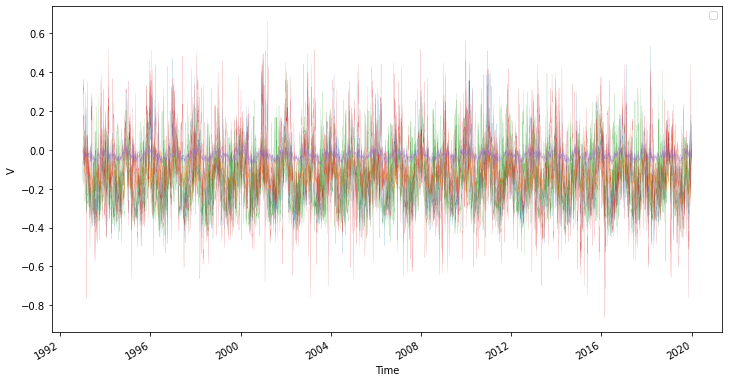

In [ ]:
V_Beddouza= d1_C.sel(lon=-9.5+360,lat=32.5).V.drop(['lat','lon','depth'])
V_Vincent= d1_C.sel(lon=-9+360,lat=37).V.drop(['lat','lon','depth'])
V_Blanc= d1_C.sel(lon=-17+360,lat=21).V.drop(['lat','lon','depth'])
V_Silleira= d1_C.sel(lon=-9+360,lat=42).V.drop(['lat','lon','depth'])
V_Juby= d1_C.sel(lon=-12.75+360,lat=28).V.drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
V_Beddouza.plot(linewidth=0.1)
V_Vincent.plot(linewidth=0.1)
V_Blanc.plot(linewidth=0.1)
V_Silleira.plot(linewidth=0.1)
V_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_V=pd.concat([V_Beddouza.to_dataframe(),V_Vincent.to_dataframe(),V_Blanc.to_dataframe(),V_Silleira.to_dataframe(),V_Juby.to_dataframe()],axis=1)
df_V.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_V.to_csv('VO_Canarias.csv',index=True,sep=',')
df_V.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,-0.058194,-0.062651,-0.082433,0.000178,-0.021881
1993-01-02,-0.102759,-0.074546,-0.129809,-0.020925,-0.035662
1993-01-03,-0.156090,-0.054072,-0.160691,-0.004831,-0.035310
1993-01-04,-0.182124,-0.027479,-0.050130,0.100348,-0.020166
1993-01-05,-0.131387,-0.019489,0.005922,0.165864,-0.003046


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
U_H=d1_C.groupby('lat').mean('lon').U.drop('depth').to_dataframe().reset_index()
V_H=d1_C.groupby('lat').mean('lon').V.drop('depth').to_dataframe().reset_index()
U_H.to_csv('Hovmoller_UO_Canarias.csv',sep=',')
V_H.to_csv('Hovmoller_VO_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## SST

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/OSTIA_SST/Canarias/Data_anual/'
var = 'SST' # elegir la variable de interes
ifile = 'OSTIA_SST.nc' # Elegir el archivo .nc
d1_SST = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_SST=d1_SST.sel(time=filtro_meses(d1_SST['time.month']))
d1_SST.lon.values[d1_SST.lon.values < 0] = d1_SST.lon.values[d1_SST.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_SST

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/OSTIA_SST/Canarias/Data_anual


<xarray.DataArray 'SST' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float64 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

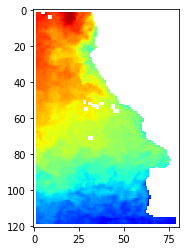

In [ ]:
plt.imshow(d1_SST.values[0,:,:],cmap='jet')

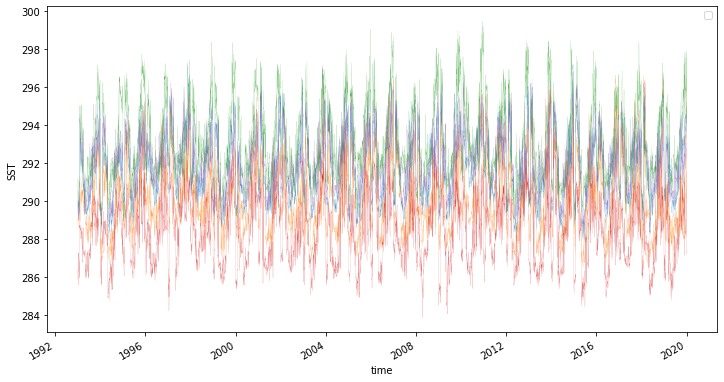

In [ ]:
T_Beddouza= d1_SST.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon'])
T_Vincent= d1_SST.sel(lon=-9+360,lat=37).drop(['lat','lon'])
T_Blanc= d1_SST.sel(lon=-17+360,lat=21).drop(['lat','lon'])
T_Silleira= d1_SST.sel(lon=-9+360,lat=42).drop(['lat','lon'])
T_Juby= d1_SST.sel(lon=-12.75+360,lat=28).drop(['lat','lon'])
plt.figure(figsize=(12,6))
T_Beddouza.plot(linewidth=0.1)
T_Vincent.plot(linewidth=0.1)
T_Blanc.plot(linewidth=0.1)
T_Silleira.plot(linewidth=0.1)
T_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_T=pd.concat([T_Beddouza.to_dataframe(),T_Vincent.to_dataframe(),T_Blanc.to_dataframe(),T_Silleira.to_dataframe(),T_Juby.to_dataframe()],axis=1)
df_T.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_T.to_csv('SST_Canarias.csv',index=True,sep=',')
df_T.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,290.009988,288.962486,291.229998,285.869989,290.519989
1993-01-02,289.969988,288.874982,290.619990,286.317506,289.404990
1993-01-03,289.734987,288.952496,290.547496,286.274995,289.417495
1993-01-04,289.552499,289.097491,290.502497,286.312493,289.382491
1993-01-05,289.507493,289.069988,290.397494,286.332497,289.387496


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
SST_H=d1_SST.groupby('lat').mean('lon').to_dataframe().reset_index()
SST_H.to_csv('Hovmoller_SST_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Salinidad

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Canarias/Data_anual/'
var = 'SSS' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_PHY_SSS.nc' # Elegir el archivo .nc
d1_S = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_S=d1_S.sel(time=filtro_meses(d1_S['time.month']))
d1_S.lon.values[d1_S.lon.values < 0] = d1_S.lon.values[d1_S.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_S

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Canarias/Data_anual


<xarray.DataArray 'SSS' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

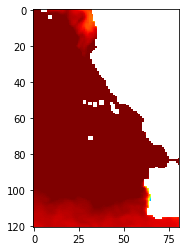

In [ ]:
plt.imshow(d1_S.values[0,:,:],cmap='jet',vmin=32, vmax=36)

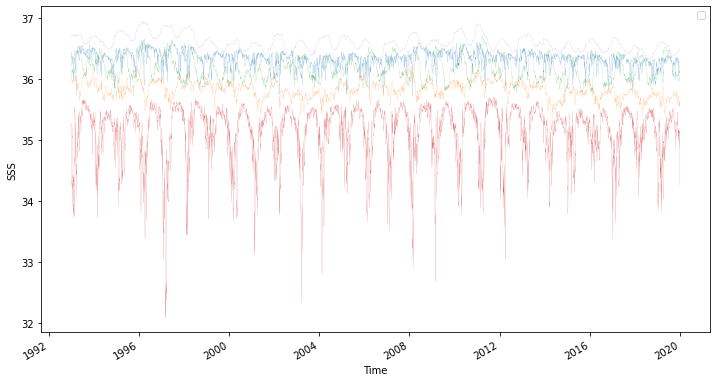

In [ ]:
S_Beddouza= d1_S.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon','depth'])
S_Vincent= d1_S.sel(lon=-9+360,lat=37).drop(['lat','lon','depth'])
S_Blanc= d1_S.sel(lon=-17+360,lat=21).drop(['lat','lon','depth'])
S_Silleira= d1_S.sel(lon=-9+360,lat=42).drop(['lat','lon','depth'])
S_Juby= d1_S.sel(lon=-12.75+360,lat=28).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
S_Beddouza.plot(linewidth=0.1)
S_Vincent.plot(linewidth=0.1)
S_Blanc.plot(linewidth=0.1)
S_Silleira.plot(linewidth=0.1)
S_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_S=pd.concat([S_Beddouza.to_dataframe(),S_Vincent.to_dataframe(),S_Blanc.to_dataframe(),S_Silleira.to_dataframe(),S_Juby.to_dataframe()],axis=1)
df_S.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_S.to_csv('S_Canarias.csv',index=True,sep=',')
df_S.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,36.210064,35.988239,36.031105,34.346859,36.678143
1993-01-02,36.270569,35.986378,36.027477,34.306725,36.677811
1993-01-03,36.355392,35.988297,36.028633,34.239670,36.678879
1993-01-04,36.423973,35.993774,36.038563,34.548420,36.680782
1993-01-05,36.443432,35.992672,36.040535,34.704590,36.682152


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
SSS_H=d1_S.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
SSS_H.to_csv('Hovmoller_S_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Oxigeno

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/Canarias/Data_anual/'
var = 'o2' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_BIO.nc' # Elegir el archivo .nc
d1_O = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_O=d1_O.sel(time=filtro_meses(d1_O['time.month']))
d1_O.lon.values[d1_O.lon.values < 0] = d1_O.lon.values[d1_O.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_O

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/Canarias/Data_anual


<xarray.DataArray 'o2' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Dissolved Oxygen
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mmol m-3
    unit_long:      millimoles of Oxygen per cubic meter
    valid_min:      0.24998258
    valid_max:      529.78735
    _ChunkSizes:    [  1  15 137 288]

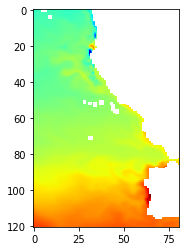

In [ ]:
plt.imshow(d1_O.values[0,:,:],cmap='jet')

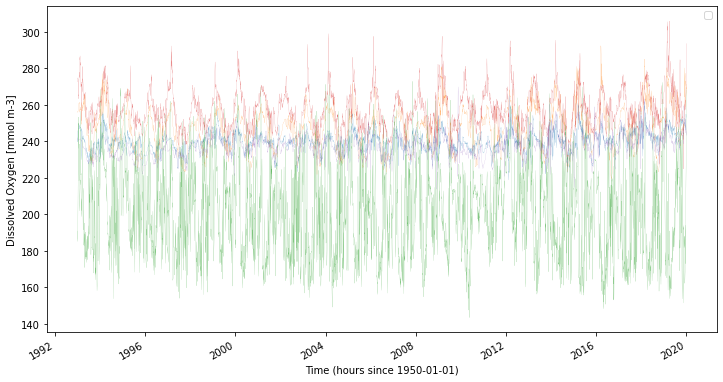

In [ ]:
O_Beddouza= d1_O.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon','depth'])
O_Vincent= d1_O.sel(lon=-9+360,lat=37).drop(['lat','lon','depth'])
O_Blanc= d1_O.sel(lon=-17+360,lat=21).drop(['lat','lon','depth'])
O_Silleira= d1_O.sel(lon=-9+360,lat=42).drop(['lat','lon','depth'])
O_Juby= d1_O.sel(lon=-12.75+360,lat=28).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
O_Beddouza.plot(linewidth=0.1)
O_Vincent.plot(linewidth=0.1)
O_Blanc.plot(linewidth=0.1)
O_Silleira.plot(linewidth=0.1)
O_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_O=pd.concat([O_Beddouza.to_dataframe(),O_Vincent.to_dataframe(),O_Blanc.to_dataframe(),O_Silleira.to_dataframe(),O_Juby.to_dataframe()],axis=1)
df_O.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_O.to_csv('O_Canarias.csv',index=True,sep=',')
df_O.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01 12:00:00,245.876968,255.779953,190.866074,272.583405,241.915497
1993-01-02 12:00:00,245.201294,256.238861,189.380615,272.862762,241.675674
1993-01-03 12:00:00,243.119370,256.321289,186.390579,273.754486,241.302505
1993-01-04 12:00:00,240.897736,256.462341,185.063019,274.528015,241.047119
1993-01-05 12:00:00,239.699326,256.630096,187.386978,274.448608,240.958237


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
O_H=d1_O.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
O_H.to_csv('Hovmoller_O_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Clorofila

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/Canarias/Data_anual/'
var = 'chl' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_BIO.nc' # Elegir el archivo .nc
d1_CHL = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_CHL=d1_CHL.sel(time=filtro_meses(d1_CHL['time.month']))
d1_CHL.lon.values[d1_CHL.lon.values < 0] = d1_CHL.lon.values[d1_CHL.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_CHL

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/Canarias/Data_anual


<xarray.DataArray 'chl' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Total Chlorophyll
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    unit_long:      milligram of Chlorophyll per cubic meter
    valid_min:      0.0026485976
    valid_max:      14.423477
    _ChunkSizes:    [  1  15 137 288]

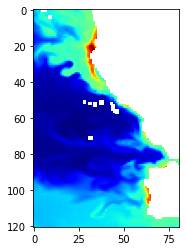

In [ ]:
plt.imshow(np.log10(d1_CHL.values[0,:,:]),cmap='jet')

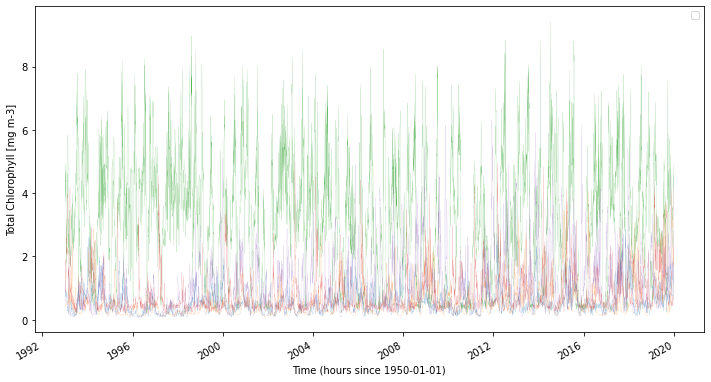

In [ ]:
C_Beddouza= d1_CHL.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon','depth'])
C_Vincent= d1_CHL.sel(lon=-9+360,lat=37).drop(['lat','lon','depth'])
C_Blanc= d1_CHL.sel(lon=-17+360,lat=21).drop(['lat','lon','depth'])
C_Silleira= d1_CHL.sel(lon=-9+360,lat=42).drop(['lat','lon','depth'])
C_Juby= d1_CHL.sel(lon=-12.75+360,lat=28).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
C_Beddouza.plot(linewidth=0.1)
C_Vincent.plot(linewidth=0.1)
C_Blanc.plot(linewidth=0.1)
C_Silleira.plot(linewidth=0.1)
C_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Beddouza.to_dataframe(),C_Vincent.to_dataframe(),C_Blanc.to_dataframe(),C_Silleira.to_dataframe(),C_Juby.to_dataframe()],axis=1)
df_C.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_C.to_csv('CHL_Canarias.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01 12:00:00,0.645665,0.485487,4.948434,1.334372,1.242868
1993-01-02 12:00:00,0.638391,0.465842,4.571266,1.306084,1.151920
1993-01-03 12:00:00,0.595073,0.440766,4.039186,1.392445,1.121857
1993-01-04 12:00:00,0.580648,0.427628,3.841074,1.468734,1.115642
1993-01-05 12:00:00,0.637183,0.423303,4.226914,1.679367,1.097849


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
C_H=d1_CHL.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
C_H.to_csv('Hovmoller_CHL_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## SSH

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSH/Canarias/Data_anual/'
var = 'SSH' # elegir la variable de interes
ifile='GLOBAL_REANALYSIS_PHY_SSH.nc'
d1_SSH = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
d1_SSH=d1_SSH.transpose('time', 'lat', 'lon')
#d1_SSH=d1_SSH.sel(time=filtro_meses(d1_SSH['time.month']))
d1_SSH.lon.values[d1_SSH.lon.values < 0] = d1_SSH.lon.values[d1_SSH.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_SSH

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSH/Canarias/Data_anual


<xarray.DataArray 'SSH' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

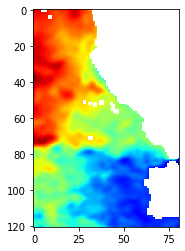

In [ ]:
plt.imshow(d1_SSH[0,:,:].values,cmap='jet')

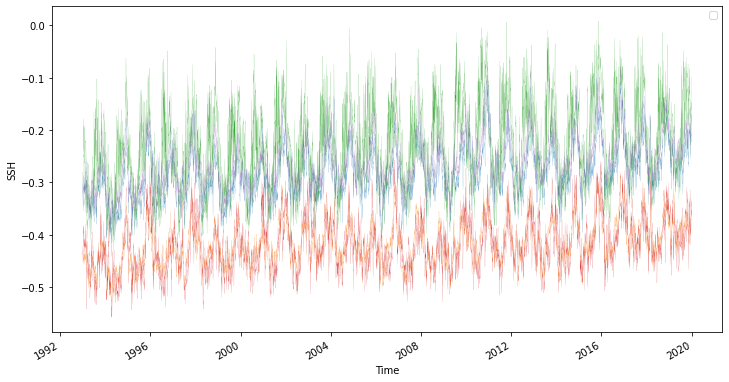

In [ ]:
C_Beddouza= d1_SSH.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon'])
C_Vincent= d1_SSH.sel(lon=-9+360,lat=37).drop(['lat','lon'])
C_Blanc= d1_SSH.sel(lon=-17+360,lat=21).drop(['lat','lon'])
C_Silleira= d1_SSH.sel(lon=-9+360,lat=42).drop(['lat','lon'])
C_Juby= d1_SSH.sel(lon=-12.75+360,lat=28).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Beddouza.plot(linewidth=0.1)
C_Vincent.plot(linewidth=0.1)
C_Blanc.plot(linewidth=0.1)
C_Silleira.plot(linewidth=0.1)
C_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Beddouza.to_dataframe(),C_Vincent.to_dataframe(),C_Blanc.to_dataframe(),C_Silleira.to_dataframe(),C_Juby.to_dataframe()],axis=1)
df_C.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_C.to_csv('SSH_Canarias.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,-0.300783,-0.435333,-0.280721,-0.422269,-0.308694
1993-01-02,-0.324208,-0.451923,-0.311450,-0.438113,-0.329300
1993-01-03,-0.328346,-0.440917,-0.324506,-0.429753,-0.338013
1993-01-04,-0.343787,-0.438930,-0.276922,-0.423421,-0.355126
1993-01-05,-0.345454,-0.440962,-0.247218,-0.419068,-0.346689


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
C_H=d1_SSH.groupby('lat').mean('lon').to_dataframe().reset_index()
C_H.to_csv('Hovmoller_SSH_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Rotor de viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Rotor_Viento/Canarias/Data_anual/'
var = 'wind_stress_curl' # elegir la variable de interes
ifile='GLOBAL_Rotor_Viento.nc'
d1_Rotor = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_Rotor=d1_Rotor.sel(time=filtro_meses(d1_Rotor['time.month']))
d1_Rotor.lon.values[d1_Rotor.lon.values < 0] = d1_Rotor.lon.values[d1_Rotor.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_Rotor

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Rotor_Viento/Canarias/Data_anual


<xarray.DataArray 'wind_stress_curl' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0

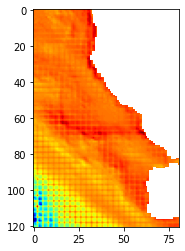

In [ ]:
plt.imshow(d1_Rotor.isel(time=0).values,cmap='jet')

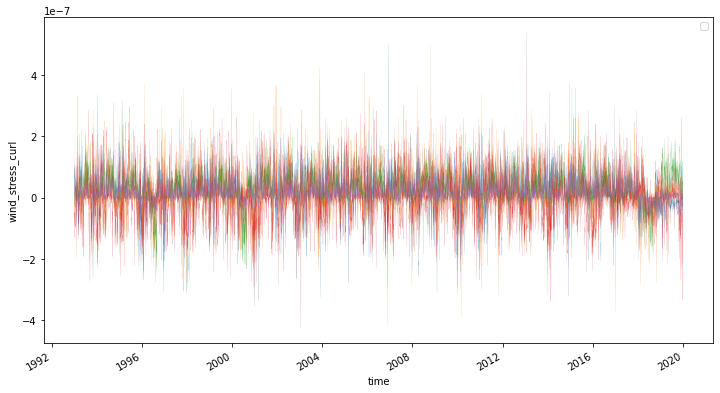

In [ ]:
C_Beddouza= d1_Rotor.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon'])
C_Vincent= d1_Rotor.sel(lon=-9+360,lat=37).drop(['lat','lon'])
C_Blanc= d1_Rotor.sel(lon=-17+360,lat=21).drop(['lat','lon'])
C_Silleira= d1_Rotor.sel(lon=-9+360,lat=42).drop(['lat','lon'])
C_Juby= d1_Rotor.sel(lon=-12.75+360,lat=28).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Beddouza.plot(linewidth=0.1)
C_Vincent.plot(linewidth=0.1)
C_Blanc.plot(linewidth=0.1)
C_Silleira.plot(linewidth=0.1)
C_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Beddouza.to_dataframe(),C_Vincent.to_dataframe(),C_Blanc.to_dataframe(),C_Silleira.to_dataframe(),C_Juby.to_dataframe()],axis=1)
df_C.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_C.to_csv('Rotor_Canarias.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,6.239861e-08,0.000000e+00,2.491288e-08,3.981404e-08,1.490116e-08
1993-01-02,9.778887e-08,3.259629e-08,5.494803e-08,1.979060e-08,3.026798e-08
1993-01-03,5.494803e-08,1.979060e-08,9.010546e-08,-2.491288e-08,1.201406e-07
1993-01-04,4.493631e-08,-5.122274e-09,9.778887e-08,-6.752089e-08,1.247972e-07
1993-01-05,3.515743e-08,-3.236346e-08,1.001172e-08,-8.987263e-08,2.980232e-08


In [ ]:
np.nanmin(d1_Rotor.values),np.nanmax(d1_Rotor.values)

(-3.162538632750511e-06, 4.134839400649071e-06)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
R_H=d1_Rotor.groupby('lat').mean('lon').to_dataframe().reset_index()
#R_H
R_H.to_csv('Hovmoller_Rotor_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Estres viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Estres_Viento/Canarias/Data_anual/'
var = 'wind_stress' # elegir la variable de interes
ifile='GLOBAL_Estres_Viento.nc'
d1_Estres = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_Estres=d1_Estres.sel(time=filtro_meses(d1_Estres['time.month']))
d1_Estres.lon.values[d1_Estres.lon.values < 0] = d1_Estres.lon.values[d1_Estres.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_Estres

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Estres_Viento/Canarias/Data_anual


<xarray.DataArray 'wind_stress' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0

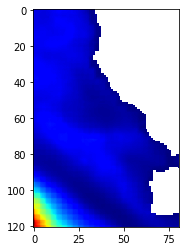

In [ ]:
plt.imshow(d1_Estres.isel(time=0).values,cmap='jet')

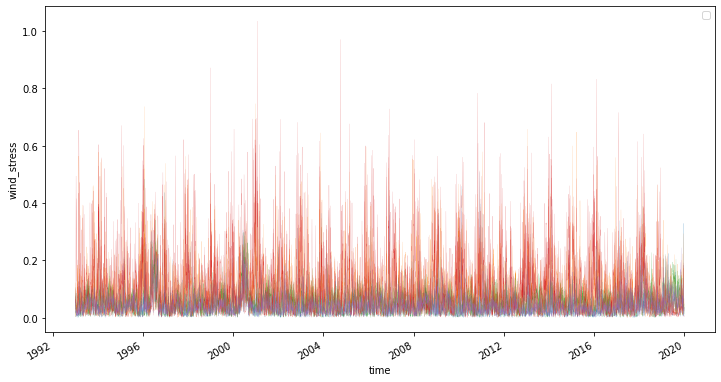

In [ ]:
C_Beddouza= d1_Estres.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon'])
C_Vincent= d1_Estres.sel(lon=-9+360,lat=37).drop(['lat','lon'])
C_Blanc= d1_Estres.sel(lon=-17+360,lat=21).drop(['lat','lon'])
C_Silleira= d1_Estres.sel(lon=-9+360,lat=42).drop(['lat','lon'])
C_Juby= d1_Estres.sel(lon=-12.75+360,lat=28).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Beddouza.plot(linewidth=0.1)
C_Vincent.plot(linewidth=0.1)
C_Blanc.plot(linewidth=0.1)
C_Silleira.plot(linewidth=0.1)
C_Juby.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Beddouza.to_dataframe(),C_Vincent.to_dataframe(),C_Blanc.to_dataframe(),C_Silleira.to_dataframe(),C_Juby.to_dataframe()],axis=1)
df_C.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_C.to_csv('Estres_Canarias.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,0.034426,0.025198,0.039625,0.064249,0.016848
1993-01-02,0.032051,0.057652,0.056326,0.028973,0.026026
1993-01-03,0.018625,0.064026,0.104399,0.036201,0.085226
1993-01-04,0.016800,0.008850,0.106249,0.101500,0.047674
1993-01-05,0.022326,0.048300,0.014551,0.057499,0.018576


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
E_H=d1_Estres.groupby('lat').mean('lon').to_dataframe().reset_index()
E_H.to_csv('Hovmoller_Estres_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## MLD

In [2]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Diario/Canarias/Data_anual/'
var = 'MLD' # elegir la variable de interes
ifile='GLOBAL_REANALYSIS_PHY_MLD.nc'
d1_MLD = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_MLD=d1_MLD.sel(time=filtro_meses(d1_MLD['time.month']))
d1_MLD.lon.values[d1_MLD.lon.values < 0] = d1_MLD.lon.values[d1_MLD.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_MLD

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Diario/Canarias/Data_anual


<xarray.DataArray 'MLD' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

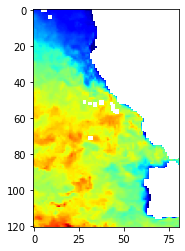

In [3]:
plt.imshow(d1_MLD.isel(time=0).values,cmap='jet')

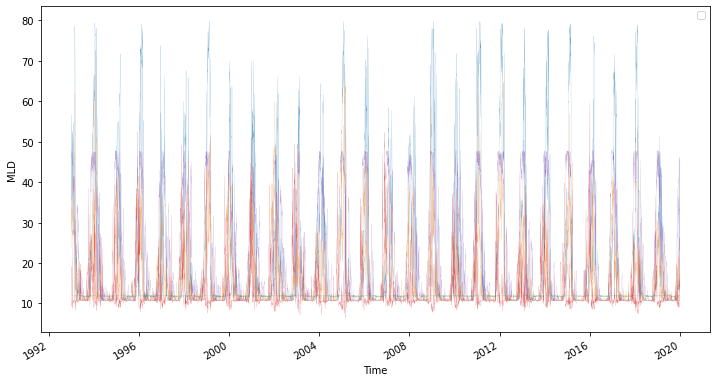

In [4]:
C_Beddouza= d1_MLD.sel(lon=-9.5+360,lat=32.5).drop(['lat','lon'])
C_Vincent= d1_MLD.sel(lon=-9+360,lat=37).drop(['lat','lon'])
C_Blanc= d1_MLD.sel(lon=-17+360,lat=21).drop(['lat','lon'])
C_Silleira= d1_MLD.sel(lon=-9+360,lat=42).drop(['lat','lon'])
C_Juby= d1_MLD.sel(lon=-12.75+360,lat=28).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Beddouza.plot(linewidth=0.1)
C_Vincent.plot(linewidth=0.1)
C_Blanc.plot(linewidth=0.1)
C_Silleira.plot(linewidth=0.1)
C_Juby.plot(linewidth=0.1)
plt.legend()

In [5]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Beddouza.to_dataframe(),C_Vincent.to_dataframe(),C_Blanc.to_dataframe(),C_Silleira.to_dataframe(),C_Juby.to_dataframe()],axis=1)
df_C.columns=['Beddouzza','St Vincent','Blanc','Cabos Silleira','Juby']
df_C.to_csv('MLD_Canarias.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Beddouzza,St Vincent,Blanc,Cabos Silleira,Juby
time,,,,,
1993-01-01,27.732586,34.398304,12.0,10.766971,44.078648
1993-01-02,32.823509,34.620476,12.0,10.782713,46.537395
1993-01-03,44.628101,36.266006,12.0,10.777481,47.567970
1993-01-04,55.493927,34.069260,12.0,10.099547,47.587357
1993-01-05,56.847328,28.642139,12.0,9.755922,47.601307


In [6]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
E_H=d1_MLD.groupby('lat').mean('lon').to_dataframe().reset_index()
E_H.to_csv('Hovmoller_MLD_Canarias.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia
